In [1]:
import torch
from shell.datasets.datasets import MNIST
from shell.utils.utils import seed_everything, create_dir_if_not_exist
from shell.learners.er_dynamic import CompositionalDynamicER
from shell.models.mlp_soft_lifelong_dynamic import MLPSoftLLDynamic
import logging

logging.basicConfig(level=logging.INFO)

seed_everything(1)


dataset = MNIST(num_tasks=10, with_replacement=True,
                num_train_per_task=128, num_val_per_task=50,
                remap_labels=False,)

# print(len(dataset.trainset[0]))
# print(dataset.trainset[0].tensors[1])

net = MLPSoftLLDynamic(i_size=28, layer_size=64, depth=4,
                       num_classes=10, num_tasks=10, num_init_tasks=4,
                       )
agent = CompositionalDynamicER(net, memory_size=64)

INFO:root:Class sequence: [6 4 1 4 5 6 6 2 2 7 9 7 1 6 4 9 8 5 4 1]
INFO:root:(128, 1, 28, 28)
INFO:root:(128, 1, 28, 28)
INFO:root:(128, 1, 28, 28)
INFO:root:(128, 1, 28, 28)
INFO:root:(128, 1, 28, 28)
INFO:root:(128, 1, 28, 28)
INFO:root:(128, 1, 28, 28)
INFO:root:(128, 1, 28, 28)
INFO:root:(128, 1, 28, 28)
INFO:root:(128, 1, 28, 28)


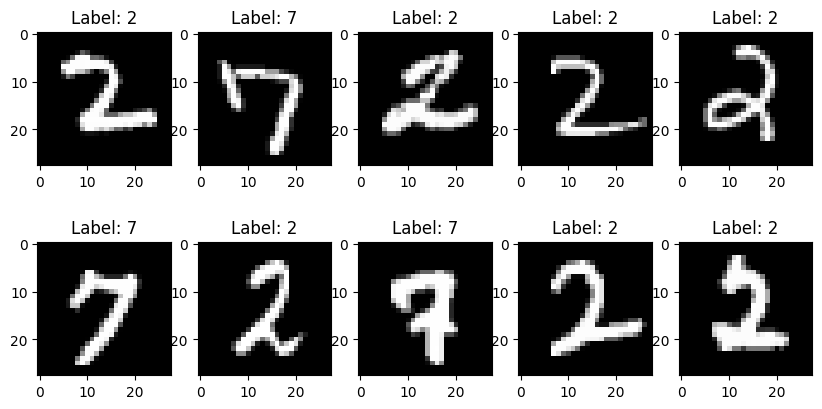

In [2]:
task_id = 4
trainset = dataset.trainset[task_id]
X, y = trainset.tensors[0], trainset.tensors[1]

# plot some of the images

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(10, 5))

for i in range(2):
    for j in range(5):
        ax[i, j].imshow(X[i*5+j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f"Label: {y[i*5+j]}")

In [3]:
dataset.class_sequence

array([6, 4, 1, 4, 5, 6, 6, 2, 2, 7, 9, 7, 1, 6, 4, 9, 8, 5, 4, 1])